In [28]:
import pandas as pd
import numpy as np

In [29]:
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('Jogadores em destaque NBA.csv')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Posição  50 non-null     int64  
 1   Jogador  50 non-null     object 
 2   Team     50 non-null     object 
 3   GP       50 non-null     int64  
 4   MPG      50 non-null     float64
 5   PPG      50 non-null     float64
 6   AC       50 non-null     int64  
 7   TDA      50 non-null     int64  
 8   %AC      50 non-null     float64
 9   3PM      50 non-null     int64  
 10  3PA      50 non-null     int64  
 11  3P%      50 non-null     float64
 12  LLC      50 non-null     int64  
 13  TDAL     50 non-null     int64  
 14  %LL      50 non-null     float64
dtypes: float64(5), int64(8), object(2)
memory usage: 6.0+ KB


In [33]:
df.head()

,Posição,Jogador,Team,GP,MPG,PPG,AC,TDA,%AC,3PM,3PA,3P%,LLC,TDAL,%LL
0,1,Stephen Curry,Warriors,50,34.0,31.4,514,1046,49.1,260,603,43.1,282,306,92.2
1,2,Bradley Beal,Wizards,48,35.4,31.1,526,1086,48.4,106,309,34.3,334,373,89.5
2,3,Joel Embiid,76ers,39,32.2,29.9,364,711,51.2,45,119,37.8,394,462,85.3
3,4,Damian Lillard,Trail Blazers,52,35.9,28.7,460,1046,44.0,212,560,37.9,360,389,92.5
4,5,Luka Doncic,Mavericks,51,35.1,28.6,519,1068,48.6,152,423,35.9,269,370,72.7


In [34]:
#extraindo as colunas que não são importantes para o estudo em causa
#colunas excluidas: %arremessos, %arremessos de 3 pontos, %Lances livres
df = df.drop(columns=['%AC', '3P%', '%LL' ])

In [35]:
df.head()

,Posição,Jogador,Team,GP,MPG,PPG,AC,TDA,3PM,3PA,LLC,TDAL
0,1,Stephen Curry,Warriors,50,34.0,31.4,514,1046,260,603,282,306
1,2,Bradley Beal,Wizards,48,35.4,31.1,526,1086,106,309,334,373
2,3,Joel Embiid,76ers,39,32.2,29.9,364,711,45,119,394,462
3,4,Damian Lillard,Trail Blazers,52,35.9,28.7,460,1046,212,560,360,389
4,5,Luka Doncic,Mavericks,51,35.1,28.6,519,1068,152,423,269,370


In [59]:
#renomeando as colunas para tornar mais fácil o estudo desta
df.columns = ['Posição', 'Jogador', 'Equipa', 'Partidas jogadas', 'Minutos por jogo', 'Pontos', 'Arremessos convertidos', 'Tentativa de arremessos', 'Arremessos de 3 pontos convertidos', 'Tentativa de arremessos de 3 pontos', 'Lances livres convertidos', 'Tentativas de arremessos livres']
df.head()

,Posição,Jogador,Equipa,Partidas jogadas,Minutos por jogo,Pontos,Arremessos convertidos,Tentativa de arremessos,Arremessos de 3 pontos convertidos,Tentativa de arremessos de 3 pontos,Lances livres convertidos,Tentativas de arremessos livres
0,1,Stephen Curry,Warriors,50,34.0,31.4,514,1046,260,603,282,306
1,2,Bradley Beal,Wizards,48,35.4,31.1,526,1086,106,309,334,373
2,3,Joel Embiid,76ers,39,32.2,29.9,364,711,45,119,394,462
3,4,Damian Lillard,Trail Blazers,52,35.9,28.7,460,1046,212,560,360,389
4,5,Luka Doncic,Mavericks,51,35.1,28.6,519,1068,152,423,269,370


In [16]:
df.describe()

,Posição,Partidas jogadas,Minutos por jogo,Pontos,Arremessos convertidos,Tentativa de arremessos,Arremessos de 3 pontos convertidos,Tentativa de arremessos de 3 pontos,Lances livres convertidos,Tentativas de arremessos livres
count,50.00000,50.000000,50.00000,50.000000,50.0000,50.000000,50.000000,50.000000,50.00000,50.000000
mean,25.50000,46.100000,34.04800,23.726000,393.4800,814.420000,102.880000,270.020000,208.68000,254.600000
std,14.57738,8.718383,1.63735,3.371901,100.5051,197.217593,52.893671,126.698339,84.01274,102.949562
min,1.00000,23.000000,27.60000,19.000000,198.0000,383.000000,2.000000,8.000000,68.00000,80.000000
25%,13.25000,41.000000,33.40000,20.725000,313.2500,664.750000,70.250000,192.000000,148.75000,172.500000
50%,25.50000,48.000000,34.00000,23.750000,393.0000,814.000000,104.000000,288.000000,205.00000,254.000000
75%,37.75000,53.000000,35.20000,25.775000,482.5000,986.750000,133.500000,340.750000,270.50000,316.000000
max,50.00000,58.000000,37.40000,31.400000,593.0000,1168.000000,260.000000,603.000000,409.00000,471.000000


In [17]:
#Quantos jogadores tem cada equipa no top 50 melhores jogadores?
df['Equipa'].value_counts()

Heat             3
Trail Blazers    3
Nets             3
Timberwolves     3
Raptors          2
Wizards          2
Hornets          2
Pacers           2
Bulls            2
Clippers         2
Celtics          2
Nuggets          2
Pelicans         2
Rockets          2
76ers            2
Lakers           2
Mavericks        2
Bucks            2
Knicks           1
Kings            1
Spurs            1
Warriors         1
Jazz             1
Pistons          1
Thunder          1
Hawks            1
Cavaliers        1
Suns             1
Name: Equipa, dtype: int64

In [18]:
#Qual a equipa com mais jogadores no top 10 melhores jogadores?
df.head(10)['Equipa'].value_counts()


Nets             2
Warriors         1
Bulls            1
76ers            1
Mavericks        1
Trail Blazers    1
Bucks            1
Pelicans         1
Wizards          1
Name: Equipa, dtype: int64

In [20]:
mais_arremessos= df['Arremessos convertidos'].max()
jogador_maisarremessos = df.loc[(df['Arremessos convertidos']== mais_arremessos)]
jogador_maisarremessos
print('O jogador com mais arremessos é ', jogador_maisarremessos['Jogador'])

O jogador com mais arremessos é  10    Nikola Jokic
Name: Jogador, dtype: object


In [60]:
#Jogadores com mais partidas jogadas
mais_jogos = df['Partidas jogadas'].max()
jogador_max = df.loc[(df['Partidas jogadas'] == mais_jogos)]
jogador_max

,Posição,Jogador,Equipa,Partidas jogadas,Minutos por jogo,Pontos,Arremessos convertidos,Tentativa de arremessos,Arremessos de 3 pontos convertidos,Tentativa de arremessos de 3 pontos,Lances livres convertidos,Tentativas de arremessos livres
23,24,Nikola Vucevic,Bulls,58,33.6,24.2,568,1168,152,364,117,140
26,27,Julius Randle,Knicks,58,37.4,23.6,486,1059,121,302,276,344


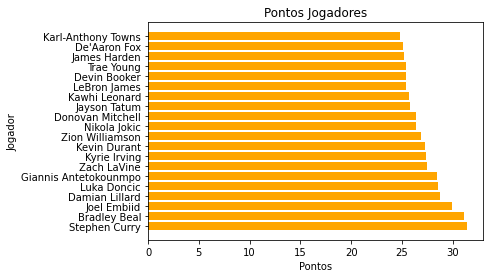

In [61]:
#%matplotlib notebook
%matplotlib inline

Jogador = df ['Jogador'].head(20).tolist()
Pontos = df ['Pontos'].head(20).tolist()
plt.barh(Jogador, Pontos, color='orange')
plt.ylabel("Jogador")
plt.xlabel("Pontos")
plt.title('Pontos Jogadores')
plt.show()

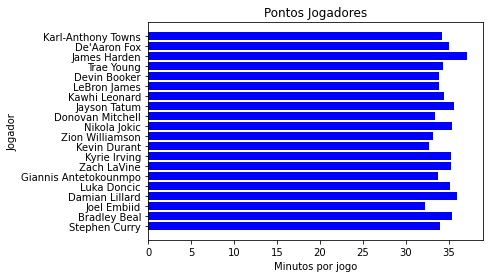

In [62]:
#%matplotlib notebook
%matplotlib inline

Jogador = df ['Jogador'].head(20).tolist()
Minutos = df ['Minutos por jogo'].head(20).tolist()
plt.barh(Jogador, Partidas, color='blue')
plt.ylabel("Jogador")
plt.xlabel("Minutos por jogo")
plt.title('Pontos Jogadores')
plt.show()

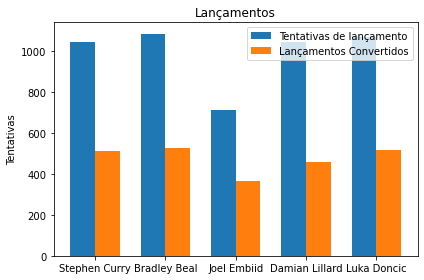

In [63]:
jogador = df ['Jogador'].head().tolist()
tentativas = df ['Tentativa de arremessos'].head().tolist()
convertidos = df ['Arremessos convertidos'].head().tolist()

x = np.arange(len(jogador))  #localizações dos jogadores no grafico
largura = 0.35  #largura das barras

fig, ax = plt.subplots()
rects1 = ax.bar(x - largura/2, tentativas, largura, label='Tentativas de lançamento')
rects2 = ax.bar(x + largura/2, convertidos, largura, label='Lançamentos Convertidos')

ax.set_ylabel('Tentativas')
ax.set_title('Lançamentos')
ax.set_xticks(x)
ax.set_xticklabels(jogador)
ax.legend()

fig.tight_layout() #espaço entre jogadores

plt.show()

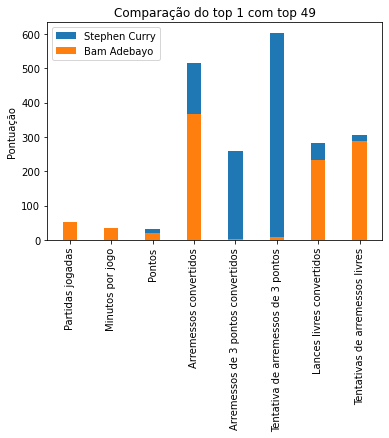

In [68]:
labels = ['Partidas jogadas','Minutos por jogo', 'Pontos','Arremessos convertidos', 'Arremessos de 3 pontos convertidos', 'Tentativa de arremessos de 3 pontos','Lances livres convertidos','Tentativas de arremessos livres']
stephen_curry = [50, 34, 31.4, 514, 260, 603,282,306]
bam_adebayo = [51, 33.4, 19, 368, 2, 8, 232, 289]
largura = 0.35
fig, ax = plt.subplots()

ax.bar(labels, stephen_curry, largura, label= 'Stephen Curry')
ax.bar(labels, bam_adebayo, largura, label= 'Bam Adebayo')

ax.set_ylabel('Pontuação')
ax.set_title('Comparação do top 1 com top 49')
ax.legend()
plt.xticks(rotation='vertical')
plt.show()